## Predictions : Train data

In [1]:
#------------autoreloader
%load_ext autoreload
%autoreload 2

In [2]:
### importing the system path
import sys
sys.path.append('../')

In [3]:
from src.basic.load_check_data import load_data, get_nan_duplicates_shape, get_info
from src.predictions.split_data import split_data, verify_split
from src.predictions.pred_and_plot import pred_train_model, best_model_predict, other_model_predict

### ============= Tree based models ==================

In [14]:
### importing the tree based models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [5]:
### setting up the data path
train_tree_path = '../data/model_ready/train_tree.csv'

In [6]:
### loading the data
train_tree = load_data(train_tree_path)
train_tree.head()

,Source,Destination,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,2,2,2,3897,0,0,0,24,3,22,20,1,10,2
1,3,3,0,7662,0,1,0,1,5,5,50,13,15,7
2,4,4,0,13882,1,0,0,9,6,9,25,4,25,19
3,3,3,1,6218,0,0,0,12,5,18,5,23,30,5
4,2,2,1,13302,0,0,0,1,3,16,50,21,35,4


In [7]:
### some inital checks on the data
get_nan_duplicates_shape(train_tree)

shape : (10681, 14) 
duplicate values : 222 
Source                       0
Destination                  0
Total_Stops                  0
Price                        0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_hour                0
dtype: int64


In [8]:
### get_info
get_info(train_tree)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Source                     10681 non-null  int64
 1   Destination                10681 non-null  int64
 2   Total_Stops                10681 non-null  int64
 3   Price                      10681 non-null  int64
 4   Airline_Jet Airways        10681 non-null  int64
 5   Airline_other              10681 non-null  int64
 6   Additional_Info_some info  10681 non-null  int64
 7   Date_of_Journey_day        10681 non-null  int64
 8   Date_of_Journey_month      10681 non-null  int64
 9   Dep_Time_hour              10681 non-null  int64
 10  Dep_Time_minute            10681 non-null  int64
 11  Arrival_Time_hour          10681 non-null  int64
 12  Arrival_Time_minute        10681 non-null  int64
 13  Duration_hour              10681 non-null  int64
dtypes: int64(14)
memory us

In [9]:
### splitting the data and veryfying the split as well
X_train_tree, X_test_tree, y_train_tree, y_test_tree = split_data(train_tree, target_feature = 'Price')
verify_split(X_train_tree, X_test_tree, y_train_tree, y_test_tree)

X_train : (8010, 13) :: y_train : (8010,) 
X_test : (2671, 13) :: y_test : (2671,)


In [10]:
### for the second verification
X_train_tree.head()

,Source,Destination,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
5584,0,0,2,0,1,0,1,5,8,20,10,35,2
8121,2,2,2,0,1,1,1,3,23,25,2,10,2
10363,2,2,2,0,1,0,6,4,9,45,12,35,2
9124,4,4,1,1,0,1,9,5,20,55,4,25,7
9176,2,2,2,0,0,0,24,3,1,30,4,15,2


##### 1. Decision tree regressor

r2 score : 0.7868506069468324
MAE : 808.5697616373394
RMSE : 2098.1426191018377
MSE : 4402202.450091518


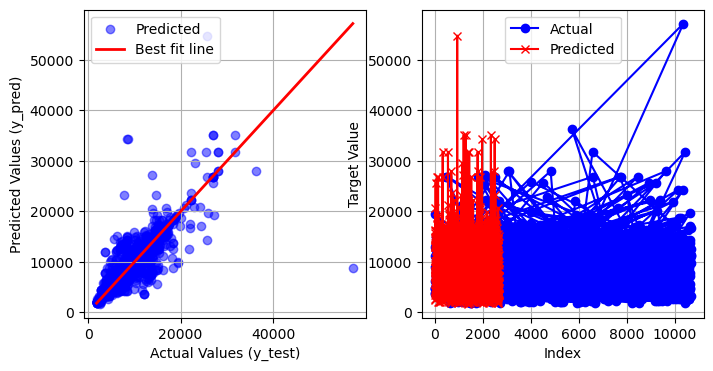

In [11]:
dtr = DecisionTreeRegressor()
model_path_dtr = '../models/trees/dtr.pkl'
pred_train_model(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = dtr, model_path = model_path_dtr)

### 2. Random forest regressor

r2 score : 0.8672027251140386
MAE : 704.3006507640723
RMSE : 1656.1037361639396
MSE : 2742679.5849361597


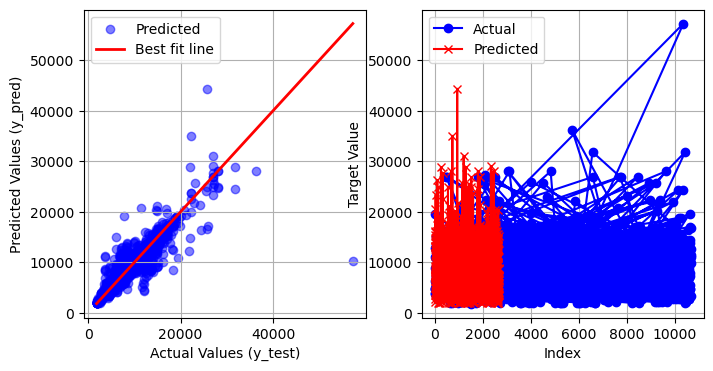

In [12]:
rfr = RandomForestRegressor()
model_path_rfr = '../models/trees/rfr.pkl'
pred_train_model(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = rfr, model_path = model_path_rfr)

##### 3. Adaboost regressor

r2 score : 0.27681601842541104
MAE : 3092.1049699120417
RMSE : 3864.7139468859255
MSE : 14936013.891254587


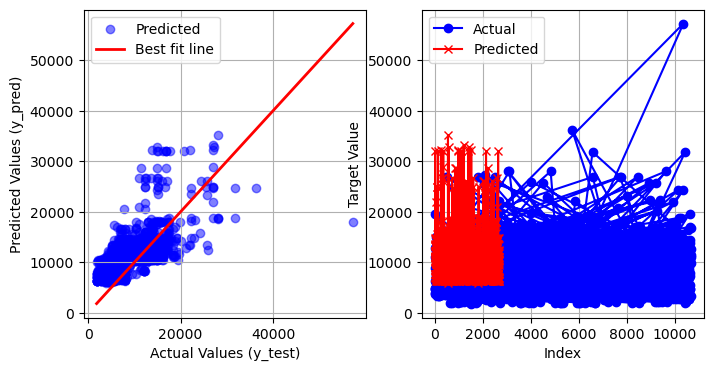

In [13]:
abr = AdaBoostRegressor()
model_path_abr = '../models/trees/abr.pkl'
pred_train_model(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = abr, model_path = model_path_abr)

##### 4. Gradient boost

r2 score : 0.7947879114761389
MAE : 1284.7117066183773
RMSE : 2058.7064520374465
MSE : 4238272.255660611


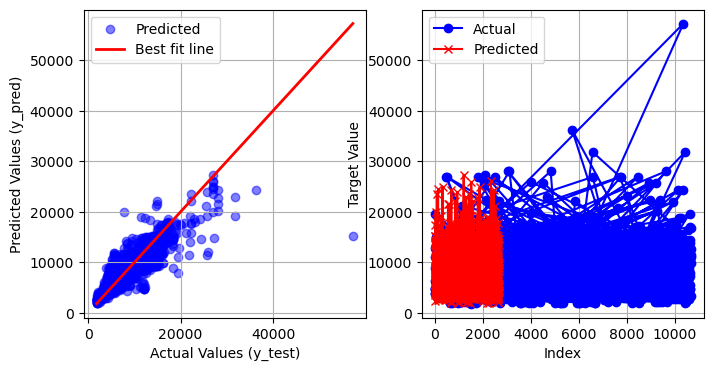

In [15]:
gbr = GradientBoostingRegressor()
model_path_gbr = '../models/trees/gbr.pkl'
pred_train_model(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = gbr, model_path = model_path_gbr)

In [16]:
### best model for the trees : Random forest regressor

### ============= Distance based models ==================

In [17]:
### importing the distance based models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [18]:
### setting up the data path
train_distance_path = '../data/model_ready/train_distance.csv'

In [19]:
### loading up the data
train_distance = load_data(train_distance_path)
train_distance.head()

,Source,Destination,Total_Stops,Price,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,2,2,2,0.027497,0,0,0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.113831
1,3,3,0,0.075920,0,1,0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.405024
2,4,4,0,0.155917,1,0,0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.698588
3,3,3,1,0.057348,0,0,0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.317225
4,2,2,1,0.148457,0,0,0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.262623


In [20]:
### verification #1
get_nan_duplicates_shape(train_distance)

shape : (10681, 14) 
duplicate values : 222 
Source                       0
Destination                  0
Total_Stops                  0
Price                        0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_hour                0
dtype: int64


In [21]:
### verification #2
get_info(train_distance)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Source                     10681 non-null  int64  
 1   Destination                10681 non-null  int64  
 2   Total_Stops                10681 non-null  int64  
 3   Price                      10681 non-null  float64
 4   Airline_Jet Airways        10681 non-null  int64  
 5   Airline_other              10681 non-null  int64  
 6   Additional_Info_some info  10681 non-null  int64  
 7   Date_of_Journey_day        10681 non-null  float64
 8   Date_of_Journey_month      10681 non-null  float64
 9   Dep_Time_hour              10681 non-null  float64
 10  Dep_Time_minute            10681 non-null  float64
 11  Arrival_Time_hour          10681 non-null  float64
 12  Arrival_Time_minute        10681 non-null  float64
 13  Duration_hour              10681 non-null  flo

In [22]:
### doing the train test split and veryfying the split
X_train_distance, X_test_distance, y_train_distance, y_test_distance = split_data(train_distance, target_feature = 'Price')
verify_split(X_train_distance, X_test_distance, y_train_distance, y_test_distance)

X_train : (8010, 13) :: y_train : (8010,) 
X_test : (2671, 13) :: y_test : (2671,)


In [23]:
### split verification #2
X_test_distance.head()

,Source,Destination,Total_Stops,Airline_Jet Airways,Airline_other,Additional_Info_some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
4830,3,3,1,0,0,0,0.884615,0.000000,0.652174,0.181818,0.826087,0.909091,0.262623
3771,3,3,1,0,1,0,0.000000,0.333333,0.304348,0.181818,0.782609,0.909091,0.532267
1523,4,4,1,1,0,1,1.000000,0.000000,0.826087,0.272727,0.826087,0.818182,0.773412
3393,4,4,1,1,0,0,0.769231,0.666667,0.347826,0.000000,0.826087,0.000000,0.532267
4169,2,2,2,1,0,0,0.423077,1.000000,0.304348,0.181818,0.434783,0.181818,0.196875


In [27]:
### setting up the scaler_for_price path
scaler_for_price = '../scalers/scaler_for_price.pkl'

##### 1. Linear Regression

r2 score : 0.3087702466946671
MAE : 1959.6336515144146
RMSE : 2925.6964895732494
MSE : 8559699.949101236


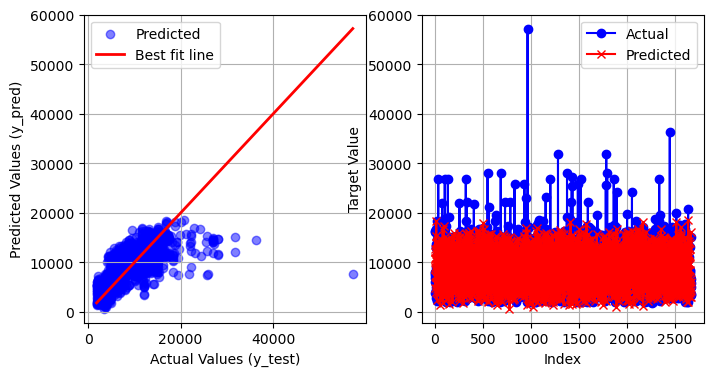

In [28]:
lr = LinearRegression()
model_path_lr = '../models/distance/lr.pkl'
pred_train_model(X_train_distance, X_test_distance, y_train_distance, y_test_distance, lr, model_path_lr, scaler_price_path = scaler_for_price)

### 2. SVR

r2 score : 0.3546176283720738
MAE : 2572.425357883453
RMSE : 3291.2997912804676
MSE : 10832654.316082848


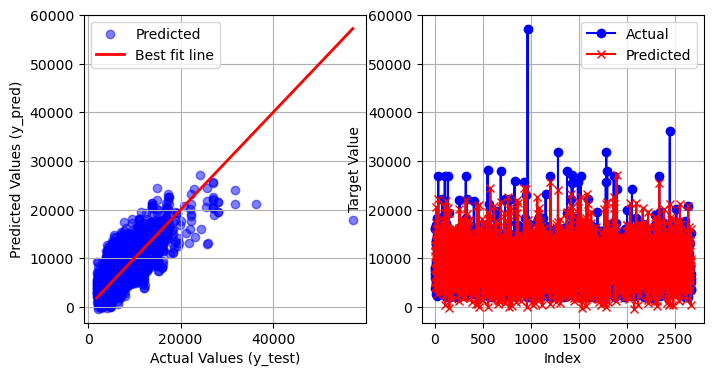

In [29]:
svr = SVR()
model_path_svr = '../models/distance/svr.pkl'
pred_train_model(X_train_distance, X_test_distance, y_train_distance, y_test_distance, svr, model_path_svr, scaler_price_path = scaler_for_price)

##### 3. KNN

r2 score : 0.77340072225854
MAE : 1066.1679520778735
RMSE : 1986.3603630787852
MSE : 3945627.4920104835


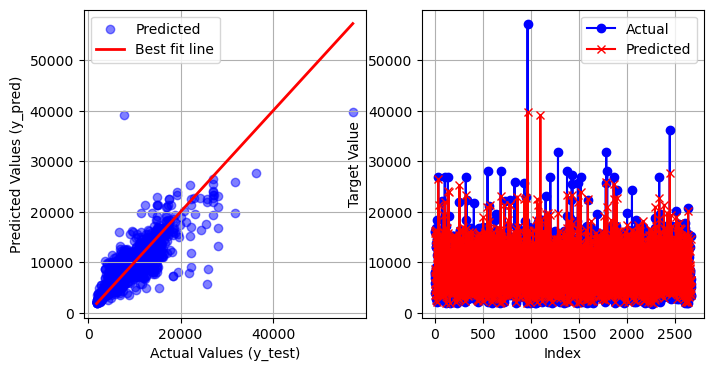

In [30]:
knn = KNeighborsRegressor()
model_path_knn = '../models/distance/knn.pkl'
pred_train_model(X_train_distance, X_test_distance, y_train_distance, y_test_distance, knn, model_path_knn, scaler_price_path = scaler_for_price)

In [31]:
### best model for distance based : KNN regressor